In [191]:
import geopandas as gpd
import pandas as pd

In [192]:
gdf_area = gpd.read_file('N03-20210101_GML/N03-21_210101.shp').fillna('')
gdf_area['N03_007_2'] = gdf_area['N03_007'].copy()
gdf_area.set_index('N03_007', drop=True, inplace=True)
gdf_area

,N03_001,N03_002,N03_003,N03_004,geometry,N03_007_2
N03_007,,,,,,
01101,北海道,石狩振興局,札幌市,中央区,"POLYGON ((141.34233 43.06682, 141.34285 43.066...",01101
01102,北海道,石狩振興局,札幌市,北区,"POLYGON ((141.40839 43.18395, 141.40833 43.183...",01102
01103,北海道,石狩振興局,札幌市,東区,"POLYGON ((141.44707 43.15616, 141.44694 43.155...",01103
01104,北海道,石狩振興局,札幌市,白石区,"POLYGON ((141.46244 43.10010, 141.46265 43.100...",01104
01105,北海道,石狩振興局,札幌市,豊平区,"POLYGON ((141.38463 43.04670, 141.38479 43.046...",01105
...,...,...,...,...,...,...
47382,沖縄県,,八重山郡,与那国町,"POLYGON ((122.99033 24.47245, 122.99031 24.472...",47382
47382,沖縄県,,八重山郡,与那国町,"POLYGON ((123.00771 24.47383, 123.00773 24.473...",47382
47382,沖縄県,,八重山郡,与那国町,"POLYGON ((123.00657 24.47437, 123.00658 24.474...",47382


In [193]:
df_MLS = pd.read_json('mls44011.json').fillna('')
df_MLS

,lat,lon,area,cell,unit,range,samples,created,updated
0,35.673958,139.447787,1,51200257,1,23,2,1651282432,1651282432
1,34.684203,135.764690,1,67932160,7,74,3,1651307728,1651307728
2,34.722659,135.726660,1,68311395,17,76,4,1646717700,1646717700
3,34.708910,135.711737,1,68445141,15,37,2,1646717700,1646717700
4,34.620415,135.686617,1,68665311,38,71,3,1649312459,1649312459
...,...,...,...,...,...,...,...,...,...
106101,26.211672,127.674478,65440,219391760,495,97,2,1637397058,1637397058
106102,26.252926,127.710943,65440,219394837,500,27,2,1649833550,1649833550
106103,26.207604,127.698940,65440,219397890,493,187,2,1650355595,1653655222
106104,26.271765,127.728284,65440,219398668,503,59,3,1649833550,1649833550


In [194]:
gdf_MLS = gpd.GeoDataFrame(data=df_MLS, geometry=gpd.points_from_xy(df_MLS.lon, df_MLS.lat), crs=6668)
gdf_MLS

,lat,lon,area,cell,unit,range,samples,created,updated,geometry
0,35.673958,139.447787,1,51200257,1,23,2,1651282432,1651282432,POINT (139.44779 35.67396)
1,34.684203,135.764690,1,67932160,7,74,3,1651307728,1651307728,POINT (135.76469 34.68420)
2,34.722659,135.726660,1,68311395,17,76,4,1646717700,1646717700,POINT (135.72666 34.72266)
3,34.708910,135.711737,1,68445141,15,37,2,1646717700,1646717700,POINT (135.71174 34.70891)
4,34.620415,135.686617,1,68665311,38,71,3,1649312459,1649312459,POINT (135.68662 34.62042)
...,...,...,...,...,...,...,...,...,...,...
106101,26.211672,127.674478,65440,219391760,495,97,2,1637397058,1637397058,POINT (127.67448 26.21167)
106102,26.252926,127.710943,65440,219394837,500,27,2,1649833550,1649833550,POINT (127.71094 26.25293)
106103,26.207604,127.698940,65440,219397890,493,187,2,1650355595,1653655222,POINT (127.69894 26.20760)
106104,26.271765,127.728284,65440,219398668,503,59,3,1649833550,1649833550,POINT (127.72828 26.27177)


In [195]:
# gpd.overlay(gdf_MLS[gdf_MLS['area'] ==33863], gdf_area, how='intersection').plot(figsize=(12,12))
# gdf_MLS[gdf_MLS['area'] ==33863]


In [196]:
mergedGdf = gpd.overlay(gdf_MLS, gdf_area, how='intersection')
mergedGdf

,lat,lon,area,cell,unit,range,samples,created,updated,N03_001,N03_002,N03_003,N03_004,N03_007_2,geometry
0,35.673958,139.447787,1,51200257,1,23,2,1651282432,1651282432,東京都,,,国立市,13215,POINT (139.44779 35.67396)
1,35.685717,139.421523,13314,71677960,11,1533,112,1615689397,1652504134,東京都,,,国立市,13215,POINT (139.42152 35.68572)
2,35.684870,139.449018,13315,71668489,308,4123,117,1613632817,1652504134,東京都,,,国立市,13215,POINT (139.44902 35.68487)
3,35.672509,139.440929,13315,71675913,113,2038,809,1614813889,1653701928,東京都,,,国立市,13215,POINT (139.44093 35.67251)
4,35.686209,139.426994,13315,71677962,338,4094,669,1616247831,1653872237,東京都,,,国立市,13215,POINT (139.42699 35.68621)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104814,24.823272,125.169252,49154,218127877,14,1190,25,1648376459,1648376459,沖縄県,,,宮古島市,47214,POINT (125.16925 24.82327)
104815,24.825154,125.158236,49154,218127878,13,870,23,1648376459,1648376459,沖縄県,,,宮古島市,47214,POINT (125.15824 24.82515)
104816,24.827253,125.149979,49925,151139841,272,0,1,1648376459,1648376459,沖縄県,,,宮古島市,47214,POINT (125.14998 24.82725)
104817,33.875906,132.679566,49536,117603329,34,2,2,1651297519,1651299158,愛媛県,,,松山市,38201,POINT (132.67957 33.87591)


<AxesSubplot:>

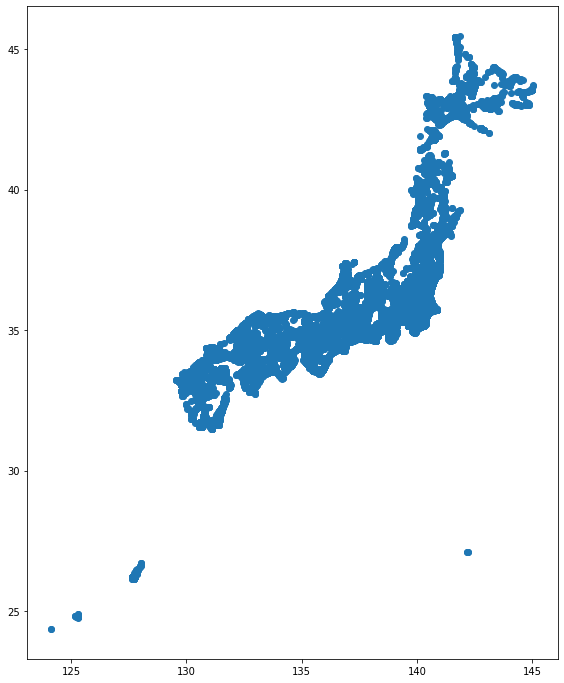

In [197]:
mergedGdf.plot(figsize=(12,12))

In [198]:
df_TAC = pd.crosstab([mergedGdf['N03_007_2'], mergedGdf['N03_001'], mergedGdf['N03_003'], mergedGdf['N03_004']], mergedGdf['area'])
df_TAC

,,,area,1,70,111,112,113,114,211,212,213,214,...,65152,65184,65216,65248,65280,65312,65344,65376,65408,65440
N03_007_2,N03_001,N03_003,N03_004,,,,,,,,,,,,,,,,,,,,,
,東京都,,所属未定地,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01101,北海道,札幌市,中央区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01102,北海道,札幌市,北区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01103,北海道,札幌市,東区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01104,北海道,札幌市,白石区,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47329,沖縄県,中頭郡,西原町,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47348,沖縄県,島尻郡,与那原町,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# MultiIndexを解除
df_TAC.reset_index(inplace=True)
# 'N03_004'が所属未定地の行を削除
df_TAC = df_TAC[df_TAC['N03_004'] != '所属未定地'].copy()
df_TAC.set_index('N03_007_2', inplace=True, drop=True)
df_TAC.sort_values('N03_007_2', inplace=True)
df_TAC

area,N03_001,N03_003,N03_004,1,70,111,112,113,114,211,...,65152,65184,65216,65248,65280,65312,65344,65376,65408,65440
N03_007_2,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市,中央区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01102,北海道,札幌市,北区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01103,北海道,札幌市,東区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01104,北海道,札幌市,白石区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01105,北海道,札幌市,豊平区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47329,沖縄県,中頭郡,西原町,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47348,沖縄県,島尻郡,与那原町,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
df_TAC_2 = df_TAC.copy()

In [201]:
#　最大値の列名をTAC値とする
df_TAC_2['TAC'] = df_TAC.iloc[:, 3:].idxmax(axis=1)
df_TAC_2

area,N03_001,N03_003,N03_004,1,70,111,112,113,114,211,...,65184,65216,65248,65280,65312,65344,65376,65408,65440,TAC
N03_007_2,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市,中央区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
01102,北海道,札幌市,北区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
01103,北海道,札幌市,東区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
01104,北海道,札幌市,白石区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
01105,北海道,札幌市,豊平区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49153
47329,沖縄県,中頭郡,西原町,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49153
47348,沖縄県,島尻郡,与那原町,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49153


In [202]:
# sample数
df_TAC_2['samples'] = df_TAC.iloc[:, 3:].max(axis=1)
df_TAC_2

area,N03_001,N03_003,N03_004,1,70,111,112,113,114,211,...,65216,65248,65280,65312,65344,65376,65408,65440,TAC,samples
N03_007_2,,,,,,,,,,,,,,,,,,,,,
01101,北海道,札幌市,中央区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,148
01102,北海道,札幌市,北区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,119
01103,北海道,札幌市,東区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,139
01104,北海道,札幌市,白石区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,99
01105,北海道,札幌市,豊平区,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1026,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47328,沖縄県,中頭郡,中城村,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49153,4
47329,沖縄県,中頭郡,西原町,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49153,17
47348,沖縄県,島尻郡,与那原町,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49153,3


In [203]:
df_TAC_3 = df_TAC_2[['N03_001', 'N03_003', 'N03_004', 'TAC', 'samples']].copy()

In [204]:
# samples数が 10以下 はゴミデータを含むので除去
df_TAC_4 = df_TAC_3[df_TAC_3['samples'] >= 10].copy()

# df_TAC_3[df_TAC_3['samples'] == 1]
# 北海道	上磯郡	木古内町	2049	1
# 宮城県	加美郡	色麻町	2311	1	
# 茨城県	結城郡	八千代町	211	1
# 高知県	長岡郡	本山町	49604	1


In [205]:
# df_TAC_3[df_TAC_3['samples'] >= 10]

In [206]:
df_TAC_4.to_csv('TAC_Rakuten.csv', index=True)

In [207]:
df_TAC_4['N03_007_3'] = df_TAC_4.index

In [208]:
# keyを'N03_007' 都道府県コードでマージ
gdf_TAC = gdf_area.merge(df_TAC_4, left_on='N03_007_2', right_on='N03_007_3')
gdf_TAC

,N03_001_x,N03_002,N03_003_x,N03_004_x,geometry,N03_007_2,N03_001_y,N03_003_y,N03_004_y,TAC,samples,N03_007_3
0,北海道,石狩振興局,札幌市,中央区,"POLYGON ((141.34233 43.06682, 141.34285 43.066...",01101,北海道,札幌市,中央区,1026,148,01101
1,北海道,石狩振興局,札幌市,北区,"POLYGON ((141.40839 43.18395, 141.40833 43.183...",01102,北海道,札幌市,北区,1026,119,01102
2,北海道,石狩振興局,札幌市,東区,"POLYGON ((141.44707 43.15616, 141.44694 43.155...",01103,北海道,札幌市,東区,1026,139,01103
3,北海道,石狩振興局,札幌市,白石区,"POLYGON ((141.46244 43.10010, 141.46265 43.100...",01104,北海道,札幌市,白石区,1026,99,01104
4,北海道,石狩振興局,札幌市,豊平区,"POLYGON ((141.38463 43.04670, 141.38479 43.046...",01105,北海道,札幌市,豊平区,1026,85,01105
...,...,...,...,...,...,...,...,...,...,...,...,...
68042,沖縄県,,島尻郡,八重瀬町,"POLYGON ((127.74956 26.11951, 127.74955 26.119...",47362,沖縄県,島尻郡,八重瀬町,49153,12,47362
68043,沖縄県,,島尻郡,八重瀬町,"POLYGON ((127.75026 26.11952, 127.75024 26.119...",47362,沖縄県,島尻郡,八重瀬町,49153,12,47362
68044,沖縄県,,島尻郡,八重瀬町,"POLYGON ((127.74970 26.11975, 127.74971 26.119...",47362,沖縄県,島尻郡,八重瀬町,49153,12,47362
68045,沖縄県,,島尻郡,八重瀬町,"POLYGON ((127.76445 26.12312, 127.76447 26.123...",47362,沖縄県,島尻郡,八重瀬町,49153,12,47362


In [209]:
gdf_simple = gdf_TAC.copy()
# simplify参考　https://shapely.readthedocs.io/en/latest/manual.html#object.simplify
gdf_simple['geometry'] = gdf_simple['geometry'].simplify(tolerance=0.00085)

In [210]:
# aggfunc='sum'にすると飛び地を含む場合に二重計上される
gdf_dissolve = gdf_simple.dissolve(by='TAC', as_index=False)
gdf_dissolve

,TAC,geometry,N03_001_x,N03_002,N03_003_x,N03_004_x,N03_007_2,N03_001_y,N03_003_y,N03_004_y,samples,N03_007_3
0,111,"MULTIPOLYGON (((139.65035 35.59266, 139.65629 ...",東京都,,,品川区,13109,東京都,,品川区,269,13109
1,112,"MULTIPOLYGON (((139.69504 35.40754, 139.69209 ...",東京都,,,大田区,13111,東京都,,大田区,366,13111
2,113,"POLYGON ((139.60326 35.68065, 139.59309 35.682...",東京都,,,世田谷区,13112,東京都,,世田谷区,620,13112
3,114,"POLYGON ((139.67910 35.73534, 139.67810 35.730...",埼玉県,,さいたま市,中央区,11105,埼玉県,さいたま市,中央区,43,11105
4,211,"POLYGON ((139.78259 35.69472, 139.77043 35.689...",東京都,,,千代田区,13101,東京都,,千代田区,420,13101
...,...,...,...,...,...,...,...,...,...,...,...,...
131,48129,"MULTIPOLYGON (((129.68804 31.62138, 129.68813 ...",鹿児島県,,,阿久根市,46206,鹿児島県,,阿久根市,19,46206
132,48130,"MULTIPOLYGON (((130.55880 31.34381, 130.55886 ...",鹿児島県,,,鹿児島市,46201,鹿児島県,,鹿児島市,58,46201
133,48131,"MULTIPOLYGON (((131.11850 31.42512, 131.11860 ...",鹿児島県,,,志布志市,46221,鹿児島県,,志布志市,11,46221
134,49153,"MULTIPOLYGON (((127.66375 26.08051, 127.66377 ...",沖縄県,,,那覇市,47201,沖縄県,,那覇市,175,47201


In [219]:
gdf_TAC_2 = gdf_dissolve[['N03_001_x', 'TAC', 'geometry']].copy()

In [220]:
# サンプル数
gdf_TAC_2['samples'] = gdf_TAC_2['TAC'].apply(lambda x: df_TAC_4[df_TAC_4['TAC'] == int(x)]['samples'].sum())
gdf_TAC_2

,N03_001_x,TAC,geometry,samples
0,東京都,111,"MULTIPOLYGON (((139.65035 35.59266, 139.65629 ...",931
1,東京都,112,"MULTIPOLYGON (((139.69504 35.40754, 139.69209 ...",1255
2,東京都,113,"POLYGON ((139.60326 35.68065, 139.59309 35.682...",1307
3,埼玉県,114,"POLYGON ((139.67910 35.73534, 139.67810 35.730...",1194
4,東京都,211,"POLYGON ((139.78259 35.69472, 139.77043 35.689...",594
...,...,...,...,...
131,鹿児島県,48129,"MULTIPOLYGON (((129.68804 31.62138, 129.68813 ...",166
132,鹿児島県,48130,"MULTIPOLYGON (((130.55880 31.34381, 130.55886 ...",58
133,鹿児島県,48131,"MULTIPOLYGON (((131.11850 31.42512, 131.11860 ...",11
134,沖縄県,49153,"MULTIPOLYGON (((127.66375 26.08051, 127.66377 ...",416


In [221]:
# 奈良県を確認
print(gdf_TAC_2[gdf_TAC_2['TAC'] == 30721]['samples'])
print(gdf_TAC_2[gdf_TAC_2['TAC'] == 30722]['samples'])

92    966
Name: samples, dtype: int64
93    506
Name: samples, dtype: int64


In [222]:
# intだとfolium.popupでカンマ表記になるので文字列へ変換
gdf_TAC_2['TAC'] = gdf_TAC_2['TAC'].astype(str)

In [223]:
# 重複チェック
gdf_TAC_2[gdf_TAC_2.duplicated()]

,N03_001_x,TAC,geometry,samples


In [224]:
# gdf_TAC_2[gdf_TAC_2['TAC'].astype(int) == 30721]

In [225]:
gdf_TAC_2.to_file('TAC_Rakuten.geojson', driver='GeoJSON', index=False)